In [ ]:
# WeatherPy
# trends shown are : 1) In the Northern Hemisphere - Max Temp vs. Latitude  has a strong negative correlation 
#with a r value (-0.84) which proves the point that as we move away from the equator and go towards  Arctic Circle,
# the temparatures decrease.  2) Conversely in the Southern Hemisphere - Max Temp vs. Latitude  has a strong positive 
# correlation with r value (0.73) which proves the point that as we move toward the equator , temperatures increase .
# 3) It is very interesting to note that in both hemispheres ,  there is barely any correaltion between latitude 
#and humidity or cloudiness or wind speed.

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV) - example of csv file to be created from dataframe made with data collected from making api calls
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [8]:
#Generate Cities List

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

In [6]:
#* Perform a weather check on each city using a series of successive API calls.

#* Include a print log of each city as it'sbeing processed (with the city number and city name).

# creating empty lists to hold data from the api calls  
Cities_record=[]
Cloudiness=[]
Country=[]
Date =[]        
Humidity=[]    
Lat =[]          
Lng=[]           
MaxTemp =[]     
WindSpeed =[]  

#setting counters to count records in the log 
count=1
setcounter=1


url =  "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# enumerate function keeps count of index 
for index, city in enumerate(cities): 
    if (index %50==0 and index >= 50) :
        setcounter=setcounter+1
        count=1
        
    else:
        pass
    
    
    response = requests.get(query_url+city).json()
    
    try:
        print(f"Processing Record {count} of Set {setcounter}|{city}")
       
        count=count+1
        Cities_record.append(response["name"])
        Cloudiness.append(response['clouds']['all']) 
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        Humidity.append(response["main"]["humidity"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        MaxTemp.append(response["main"]["temp_max"])
        WindSpeed.append(response["wind"]["speed"])
    
    
    except (KeyError, IndexError):
        print("City not found")
    
                      
                    
    
   
 

Processing Record 1 of Set 1|puerto ayora
Processing Record 2 of Set 1|barrow
Processing Record 3 of Set 1|busselton
Processing Record 4 of Set 1|asayita
City not found
Processing Record 5 of Set 1|trogir
Processing Record 6 of Set 1|enshi
Processing Record 7 of Set 1|inta
Processing Record 8 of Set 1|butaritari
Processing Record 9 of Set 1|marcona
City not found
Processing Record 10 of Set 1|catuday
Processing Record 11 of Set 1|college
Processing Record 12 of Set 1|hermanus
Processing Record 13 of Set 1|vaini
Processing Record 14 of Set 1|adre
Processing Record 15 of Set 1|petropavlovsk-kamchatskiy
Processing Record 16 of Set 1|inhambane
Processing Record 17 of Set 1|mataura
Processing Record 18 of Set 1|ushuaia
Processing Record 19 of Set 1|kaeo
Processing Record 20 of Set 1|albany
Processing Record 21 of Set 1|nikolskoye
Processing Record 22 of Set 1|punta arenas
Processing Record 23 of Set 1|bhikangaon
Processing Record 24 of Set 1|guilin
Processing Record 25 of Set 1|kuala tereng

Processing Record 2 of Set 5|ormara
Processing Record 3 of Set 5|hargeysa
Processing Record 4 of Set 5|tubruq
City not found
Processing Record 5 of Set 5|norman wells
Processing Record 6 of Set 5|thompson
Processing Record 7 of Set 5|mao
Processing Record 8 of Set 5|deputatskiy
Processing Record 9 of Set 5|gizo
Processing Record 10 of Set 5|illoqqortoormiut
City not found
Processing Record 11 of Set 5|pereira barreto
Processing Record 12 of Set 5|ponta do sol
Processing Record 13 of Set 5|bambous virieux
Processing Record 14 of Set 5|tuktoyaktuk
Processing Record 15 of Set 5|aranos
Processing Record 16 of Set 5|touros
Processing Record 17 of Set 5|takoradi
Processing Record 18 of Set 5|hunza
City not found
Processing Record 19 of Set 5|saint-francois
Processing Record 20 of Set 5|kavaratti
Processing Record 21 of Set 5|ginda
Processing Record 22 of Set 5|saint-georges
Processing Record 23 of Set 5|coihaique
Processing Record 24 of Set 5|tumannyy
City not found
Processing Record 25 of S

Processing Record 2 of Set 9|omsukchan
Processing Record 3 of Set 9|margate
Processing Record 4 of Set 9|barawe
City not found
Processing Record 5 of Set 9|rungata
City not found
Processing Record 6 of Set 9|pundaguitan
Processing Record 7 of Set 9|xining
Processing Record 8 of Set 9|axim
Processing Record 9 of Set 9|obera
Processing Record 10 of Set 9|canton
Processing Record 11 of Set 9|chikoy
City not found
Processing Record 12 of Set 9|tomatlan
Processing Record 13 of Set 9|vilyuysk
Processing Record 14 of Set 9|portage
Processing Record 15 of Set 9|sisimiut
Processing Record 16 of Set 9|necochea
Processing Record 17 of Set 9|kozhva
Processing Record 18 of Set 9|west bay
Processing Record 19 of Set 9|yafran
Processing Record 20 of Set 9|pictou
Processing Record 21 of Set 9|myitkyina
Processing Record 22 of Set 9|buala
Processing Record 23 of Set 9|lukovetskiy
Processing Record 24 of Set 9|tatsinskaya
City not found
Processing Record 25 of Set 9|newcastle
Processing Record 26 of Set

Processing Record 1 of Set 13|hegang
Processing Record 2 of Set 13|bowen
Processing Record 3 of Set 13|cilegon
Processing Record 4 of Set 13|srandakan
Processing Record 5 of Set 13|tongliao
Processing Record 6 of Set 13|ruatoria
City not found
Processing Record 7 of Set 13|gaoual
Processing Record 8 of Set 13|tahta
City not found
Processing Record 9 of Set 13|singaraja
Processing Record 10 of Set 13|challapata
Processing Record 11 of Set 13|oktyabrskiy
Processing Record 12 of Set 13|babu
Processing Record 13 of Set 13|buenavista
Processing Record 14 of Set 13|kingsport
Processing Record 15 of Set 13|kruisfontein
Processing Record 16 of Set 13|motygino
Processing Record 17 of Set 13|dargaville
Processing Record 18 of Set 13|dwarka
Processing Record 19 of Set 13|pedernales
Processing Record 20 of Set 13|erdemli
Processing Record 21 of Set 13|portland
Processing Record 22 of Set 13|sao bernardo
Processing Record 23 of Set 13|concordia
Processing Record 24 of Set 13|san vicente
Processing 

In [14]:
#Convert Raw Data to DataFrame
#Display the DataFrame

cities_df = pd.DataFrame({"City":Cities_record,"Cloudiness":Cloudiness,"Country":Country,
                          "Date":Date,"Humidity":Humidity,"Lat":Lat,"Lng":Lng,
                          "MaxTemp":MaxTemp,"WindSpeed":WindSpeed})
cities_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Puerto Ayora,20,EC,1570555089,60,-0.74,-90.35,75.20,21.92
1,Barrow,66,AR,1570555089,37,-38.31,-60.23,64.31,13.05
2,Busselton,100,AU,1570555089,50,-33.64,115.35,61.00,15.10
3,Trogir,0,HR,1570555044,45,43.52,16.25,62.60,3.36
4,Enshi,53,CN,1570555089,93,30.29,109.48,55.67,5.53


In [15]:
cities_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
MaxTemp       550
WindSpeed     550
dtype: int64

In [16]:
cities_df.to_csv("WeatherOutput_data/cities.csv", index=False, header=True)

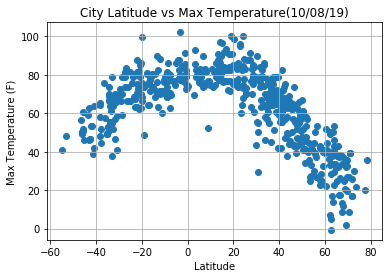

In [17]:
#Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot

plt.scatter(cities_df["Lat"],cities_df["MaxTemp"])
plt.title("City Latitude vs Max Temperature(10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("HWImages/Latv_vs_MaxTemp.png")
plt.show()

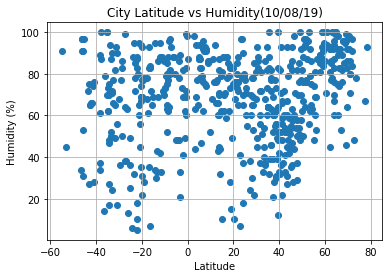

In [18]:
#Latitude vs. Humidity Plot

plt.scatter(cities_df["Lat"],cities_df["Humidity"])
plt.title("City Latitude vs Humidity(10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("HWImages/Latv_vs_Humidity.png")
plt.show()

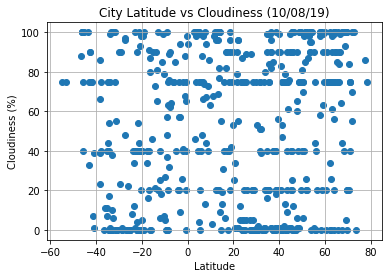

In [19]:
#Latitude vs. Cloudiness Plot

plt.scatter(cities_df["Lat"],cities_df["Cloudiness"])
plt.title("City Latitude vs Cloudiness (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("HWImages/Latv_vs_Cloudiness.png")
plt.show()

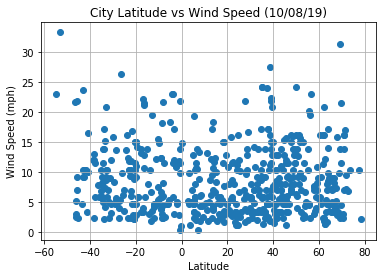

In [20]:
#Latitude vs. Wind Speed Plot

plt.scatter(cities_df["Lat"],cities_df["WindSpeed"])
plt.title("City Latitude vs Wind Speed (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("HWImages/Latv_vs_WindSpeed.png")
plt.show()

In [21]:
#Linear Regression
#OPTIONAL: Create a function to create Linear Regression plots
# Create Northern and Southern Hemisphere DataFrames


In [22]:
# Northern Hemisphere dataframe
cities_df.head()
north_df = cities_df.loc[cities_df["Lat"]>0,:]
north_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
3,Trogir,0,HR,1570555044,45,43.52,16.25,62.60,3.36
4,Enshi,53,CN,1570555089,93,30.29,109.48,55.67,5.53
5,Inta,84,RU,1570555090,83,66.04,60.13,38.03,7.07
6,Butaritari,100,KI,1570554708,63,3.07,172.79,85.55,9.82
7,Catuday,6,PH,1570555090,71,16.29,119.81,82.49,2.91


In [23]:
# Southern Hemisphere dataframe
south_df= cities_df.loc[cities_df["Lat"]<0]
south_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,MaxTemp,WindSpeed
0,Puerto Ayora,20,EC,1570555089,60,-0.74,-90.35,75.20,21.92
1,Barrow,66,AR,1570555089,37,-38.31,-60.23,64.31,13.05
2,Busselton,100,AU,1570555089,50,-33.64,115.35,61.00,15.10
9,Hermanus,17,ZA,1570554657,70,-34.42,19.24,66.99,5.01
13,Inhambane,40,MZ,1570554925,88,-23.87,35.38,78.80,16.11


y = -0.93x + 95.95
The r value is :-0.8462153471709911
The r-squared is : 0.716080413787721


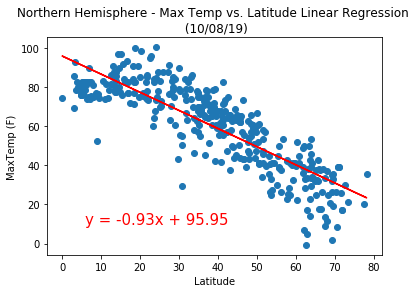

In [25]:
# creating a function 
def linear_regression(x_axis, y_axis,x,y ):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    regress_values = x_axis * slope + intercept
    line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #line = (f"y= {round(slope,2)}x + {round(intercept,2)}")
    print(line)
    print(f"The r value is :{rvalue}")
    print(f"The r-squared is : {rvalue**2}")
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line,(x,y),fontsize=15,color="red")

#Northern Hemisphere - Max Temp vs. Latitude Linear Regression plot

linear_regression(north_df["Lat"], north_df["MaxTemp"],6,10)
plt.xlabel('Latitude')
plt.ylabel('MaxTemp (F)')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression \n (10/08/19)")
plt.savefig("HWImages/NH_Latv_vs_MaxTemp.png")
plt.show()

y = 0.68x + 84.33
The r value is :0.7277213963286125
The r-squared is : 0.5295784306744655


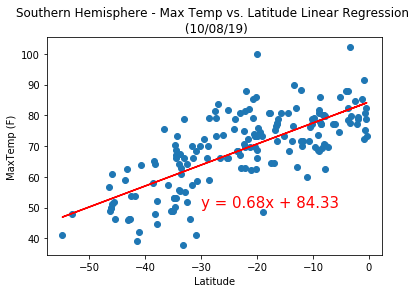

In [26]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression plot

linear_regression(south_df["Lat"], south_df["MaxTemp"],-30,50)
plt.xlabel('Latitude')
plt.ylabel('MaxTemp (F)')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression \n (10/08/19)")
plt.savefig("HWImages/SH_Latv_vs_MaxTemp.png")
plt.show()

y = 0.16x + 63.53
The r value is :0.15456884461261816
The r-squared is : 0.023891527724879697


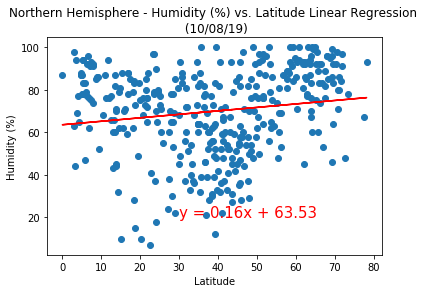

In [27]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression plot


linear_regression(north_df["Lat"], north_df["Humidity"],30,20)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression \n (10/08/19)")
plt.savefig("HWImages/NV_Latv_vs_Humidity.png")
plt.show()

y = 0.14x + 68.63
The r value is :0.07674576214858743
The r-squared is : 0.005889912007767555


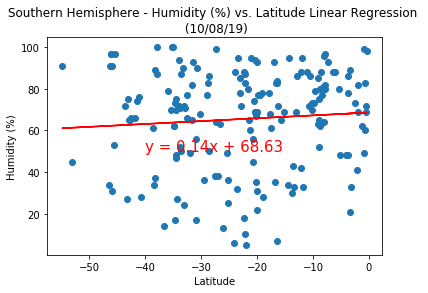

In [28]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression plot

linear_regression(south_df["Lat"], south_df["Humidity"],-40,50)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression \n (10/08/19)")
plt.savefig("HWImages/SH_Latv_vs_Humidity.png")
plt.show()

y = 0.11x + 47.63
The r value is :0.0578473315585608
The r-squared is : 0.003346313768446064


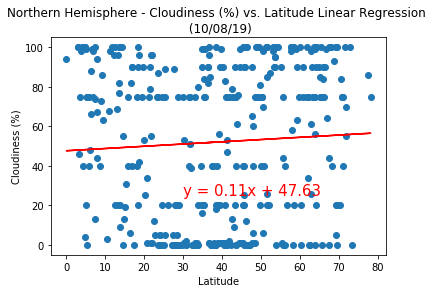

In [29]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot

linear_regression(north_df["Lat"], north_df["Cloudiness"],30,25)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression \n (10/08/19)")
plt.savefig("HWImages/NH_Latv_vs_Cloudiness.png")
plt.show()

y = -0.08x + 42.86
The r value is :-0.02962732037044504
The r-squared is : 0.0008777781123329877


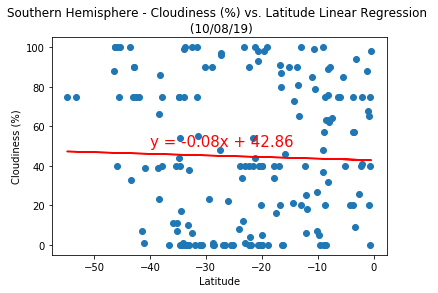

In [30]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression plot

linear_regression(south_df["Lat"], south_df["Cloudiness"],-40,50)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression \n (10/08/19)")
plt.savefig("HWImages/SH_Latv_vs_Cloudiness.png")
plt.show()

y = 0.03x + 6.8
The r value is :0.12219165885719423
The r-squared is : 0.014930801494272932


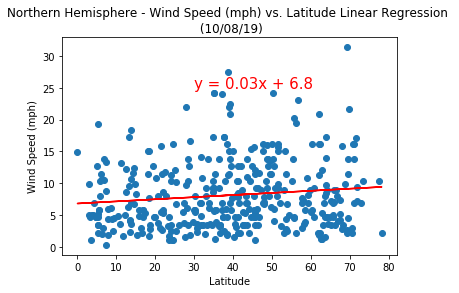

In [31]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression plot

linear_regression(north_df["Lat"], north_df["WindSpeed"],30,25)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression \n (10/08/19)")
plt.savefig("HWImages/NH_Latv_vs_WindSpeed.png")
plt.show()

y = -0.04x + 8.34
The r value is :-0.09110005353931026
The r-squared is : 0.008299219754865196


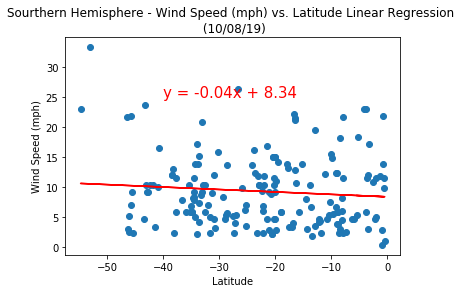

In [32]:
#Sourthern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression plot

linear_regression(south_df["Lat"], south_df["WindSpeed"],-40,25)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("Sourthern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression \n (10/08/19)")
plt.savefig("HWImages/SH_Latv_vs_WindSpeed.png")
plt.show()